In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 1. Load dataset
df = pd.read_csv("/content/hypertension_dataset 2.csv")
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [3]:
target_col = [c for c in df.columns if "hyper" in c][0]
print("Target column:", target_col)

Target column: has_hypertension


In [4]:
# 3. Handle missing values
df = df.fillna(df.median(numeric_only=True))
df = df.fillna(df.mode().iloc[0])

In [5]:
# 4. Encode categorical features
for col in df.select_dtypes(include=["object", "category"]).columns:
    df[col] = df[col].astype("category").cat.codes

In [7]:
# 5. Split features/target
X = df.drop(columns=[target_col])
y = df[target_col].astype(int)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [8]:
# 6. Train Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [9]:
y_pred = rf.predict(X_test)

In [10]:
# 8. Metrics
print("\n=== Random Forest Results ===")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))


=== Random Forest Results ===
Accuracy : 0.9596977329974811
Precision: 0.9523809523809523
Recall   : 0.970873786407767
F1 Score : 0.9615384615384616


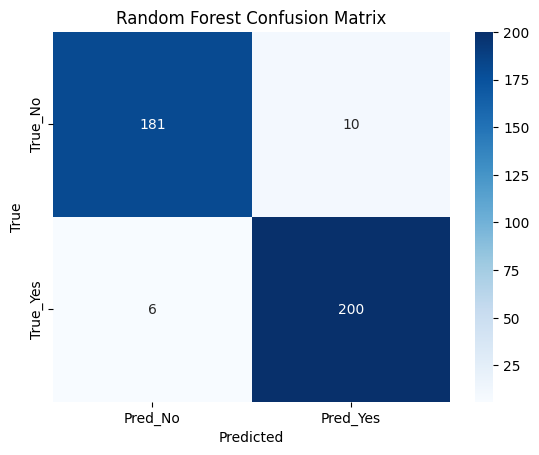

In [11]:
# 9. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred_No","Pred_Yes"],
            yticklabels=["True_No","True_Yes"])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()